In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
raw_data = pd.read_csv('data_num.csv', delimiter=",")
raw_data = pd.DataFrame(raw_data)
data = pd.read_csv('data_cleaned.csv', delimiter=",")
data = pd.DataFrame(data)

data[:10]

,Unnamed: 0,Duration (in seconds),UserLanguage,participant_number,age,gender,ethnicity,political_orientation,political_orientation_text,achieved_education,...,bothered_post,uneasy_post,uncomfortable_post,sandwich,diet,diet_text,reason_for_choice,labels_attention,feeling_observed,did_value_activation_affect_choice
0,0,1837,FR,26,22,2,3,3,NaN,3,...,0,0,0,5,3,NaN,je n'ai pas pris de sandwich car je n'avais pa...,1,2,NaN
1,1,2522,FR,59,24,2,2,3,NaN,3,...,0,0,0,1,3,NaN,j'aime le pesto; j'aime les légumes; sandwich ...,1,2,NaN
2,2,2356,EN,136,27,2,1,1,NaN,3,...,0,19,19,1,1,NaN,It was veggie and looked tasty,1,2,2.0
3,3,1168,EN,55,23,2,2,1,NaN,4,...,5,0,0,2,7,No red meat (pork included),It was vegetarian and looked tasty,2,2,NaN
4,4,1291,EN,106,22,1,1,1,NaN,3,...,90,90,46,1,3,NaN,Because I had just said that I care about CO2 ...,1,1,1.0
5,5,1157,FR,25,23,2,3,2,NaN,2,...,47,47,48,5,3,NaN,-,1,1,NaN
6,6,2915,EN,52,21,2,1,1,NaN,2,...,0,0,37,3,3,NaN,I like ham and cheese; and the pesto one seeme...,1,2,NaN
7,7,3043,FR,57,23,2,1,1,NaN,3,...,37,39,40,2,1,NaN,je suis végé mais j'essaie d'être le plus véga...,3,1,NaN
8,8,5843,FR,137,21,2,1,2,NaN,3,...,3,5,4,3,3,NaN,J'avais une envie de jambon,1,2,2.0
9,9,1030,FR,109,22,2,1,2,NaN,3,...,0,0,0,1,3,NaN,il avait l'air bon j'adore le pesto,1,2,2.0


## Preprocessing

In [59]:
#create a copy of the data
df = data.copy()
df.drop(df.columns[0],axis=1,inplace=True)
df.drop(['Duration (in seconds)', 'participant_number', 'political_orientation_text','video', 'achieved_education','T_academic_performance','Q25_First Click','diet', 'reason_for_choice' ],axis=1, inplace=True)
df.fillna(0,inplace=True)#replace Nan value with 0

df.describe(include='all')

,UserLanguage,age,gender,ethnicity,political_orientation,achieved_education_text,bothered_pre,uneasy_pre,uncomfortable_pre,C_time_alone,...,T_time_alone,value_activation,bothered_post,uneasy_post,uncomfortable_post,sandwich,diet_text,labels_attention,feeling_observed,did_value_activation_affect_choice
count,34,34.000000,34.000000,34.000000,34.000000,34.0,34.000000,34.00000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0,34.000000,34.000000,34.000000
unique,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
top,FR,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
freq,27,NaN,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN
mean,NaN,23.323529,1.647059,1.264706,1.970588,NaN,7.382353,11.00000,6.235294,0.500000,...,0.500000,0.500000,11.411765,6.941176,12.941176,2.705882,NaN,1.205882,1.794118,0.882353
std,NaN,2.920363,0.485071,0.618347,1.086705,NaN,16.560293,18.77458,10.319322,0.507519,...,0.507519,0.507519,22.941451,18.102304,19.995365,1.508148,NaN,0.538202,0.538202,0.945955
min,NaN,19.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,0.000000
25%,NaN,22.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,1.000000,1.250000,0.000000
50%,NaN,23.000000,2.000000,1.000000,2.000000,NaN,0.000000,2.00000,0.000000,0.500000,...,0.500000,0.500000,0.000000,0.000000,2.500000,2.500000,NaN,1.000000,2.000000,0.500000
75%,NaN,24.000000,2.000000,1.000000,2.750000,NaN,8.750000,14.50000,9.000000,1.000000,...,1.000000,1.000000,8.000000,3.500000,20.500000,4.000000,NaN,1.000000,2.000000,2.000000


In [55]:
df.shape

(34, 21)

In [57]:
def get_feature_stats(df):
    """
    Obtains descriptive statistics for all features and percentage of missing 
    values
    
    Parameters
    ----------
    df : DataFrame
         Containing all data

    Returns
    -------
    stats : DataFrame
            Containing the statistics for all features.
                   
    """
    numerical = df.describe(include= ['float64'])
    categorical = df.describe(include= ['object'])
    stats = pd.concat([numerical, categorical])
    stats = stats.loc[['mean', 'std', '50%', 'unique', 'top', 'freq']]
   
    return stats
stats = get_feature_stats(df)
print(stats)

        bothered_pre  uneasy_pre  uncomfortable_pre  C_time_alone  \
mean        7.382353    11.00000           6.235294      0.500000   
std        16.560293    18.77458          10.319322      0.507519   
50%         0.000000     2.00000           0.000000      0.500000   
unique           NaN         NaN                NaN           NaN   
top              NaN         NaN                NaN           NaN   
freq             NaN         NaN                NaN           NaN   

        C_academic_performance  T_time_alone  value_activation  \
mean                  0.558824      0.500000          0.500000   
std                   0.612554      0.507519          0.507519   
50%                   0.500000      0.500000          0.500000   
unique                     NaN           NaN               NaN   
top                        NaN           NaN               NaN   
freq                       NaN           NaN               NaN   

        did_value_activation_affect_choice UserLangua

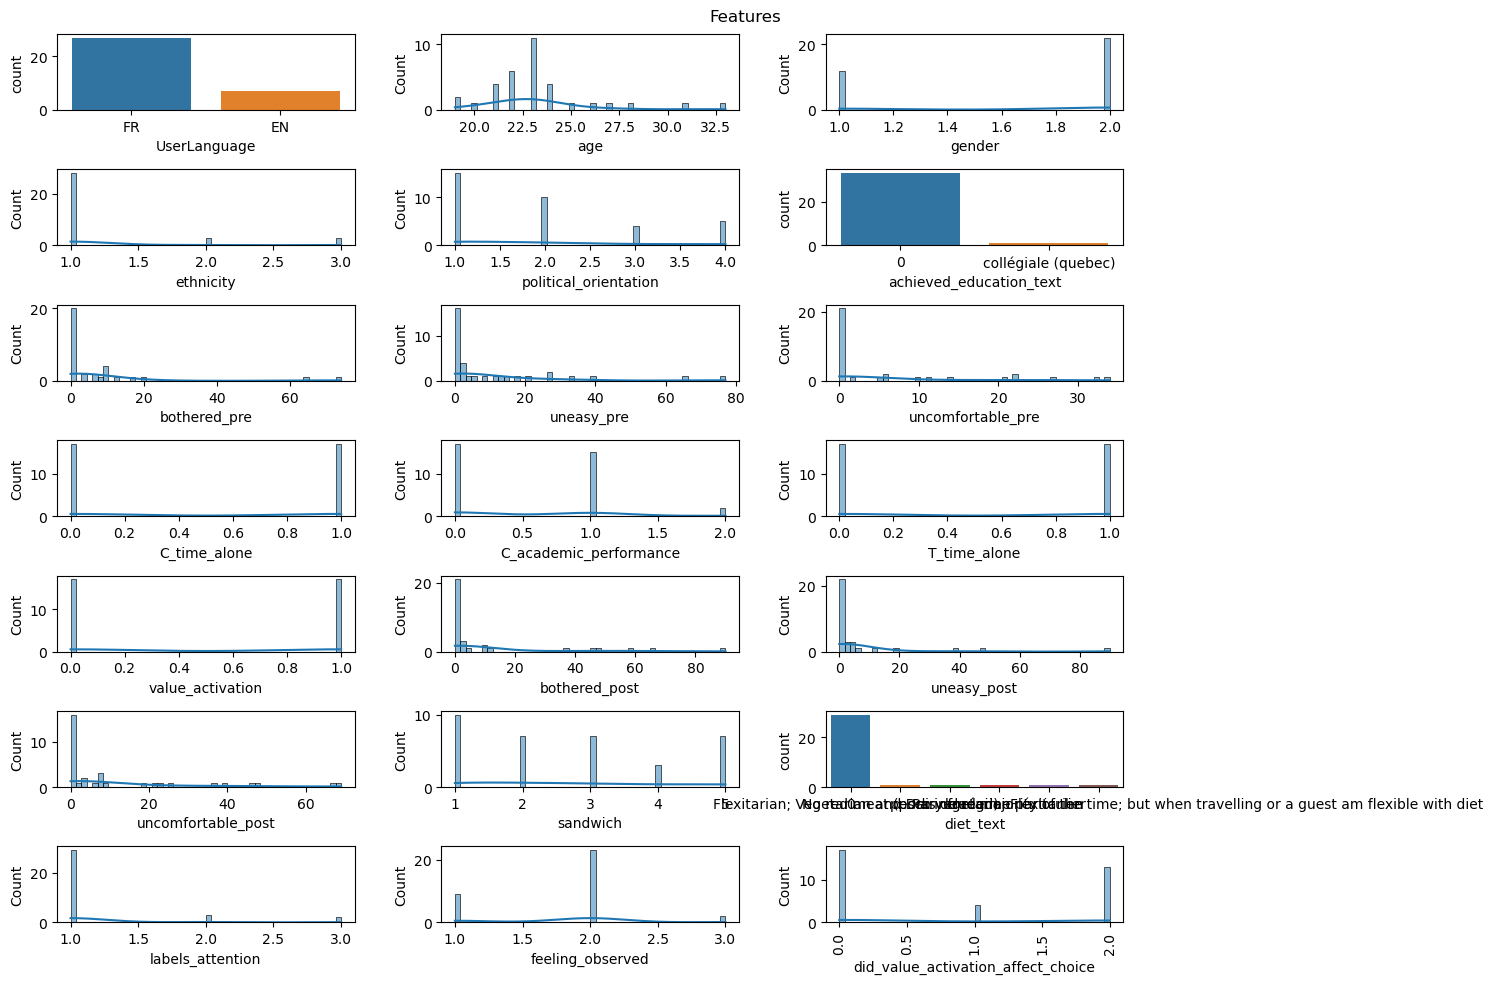

In [60]:
import seaborn as sns

#univariate analysis



def plot_features(df):
    """
    Plots all features individually in the same figure
    
    Parameters
    ----------
    df : DataFrame
         Containing all data
    """    
    df = df.copy()
    
    def plot_features(df, title):
    
        continuous_cols = list(df._get_numeric_data().columns)
        categorical_cols = list(set(df.columns) - set(continuous_cols))
        fig, axes = plt.subplots(7, 3, figsize=(15,10))
        for i, col in enumerate(df.columns):
            ax = axes[i // 3, i % 3]
            data = df[~df[col].isna()]
            if col in continuous_cols:
                sns.histplot(data=data[col], bins=50, ax=ax, kde=True) #Filter out nan values in the features
                plt.xticks(rotation=90)
            elif col in categorical_cols:
                sns.countplot(data=data, x=col, ax=ax)
                plt.xticks(rotation=90)
            else:
                print(col)
        fig.suptitle(title)
        fig.tight_layout()
    
        
    plot_features(df,"Features")
    plt.show()
    
    
plot_features(df)